In [1]:
# Packages

import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from datetime import datetime
import plotly as px
import seaborn as sns
import matplotlib.pyplot as plt

#Encoding packages

from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

### READING THE CSV FILES

In [ ]:
# READING FILE FOR 1990 to 1999
# Remaing Lease column is not there

df_1= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 1990 - 1999.csv")
df_1.head(2)

In [ ]:
# READING FILE FOR 2000 TO 2012
# Remaing Lease column is not there

df_2= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices\Resale Flat Prices (Based on Approval Date), 2000 - Feb 2012.csv")
df_2.head(2)

In [ ]:
# READING FILE FOR 2012 to 2014 
# Remaing Lease column is not there

df_3= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Mar 2012 to Dec 2014.csv")
df_3.head(2)


In [5]:
# READING FILE FOR 2015 to 2016

df_4= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices\Resale Flat Prices (Based on Registration Date), From Jan 2015 to Dec 2016.csv")
df_4.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [6]:
# READING FILE FOR 2017 ONWARDS

df_5= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices\Resale flat prices based on registration date from Jan-2017 onwards.csv")
df_5.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.0,Improved,1979,61 years 04 months,232000.0
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.0,New Generation,1978,60 years 07 months,250000.0
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,262000.0
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.0,New Generation,1980,62 years 01 month,265000.0
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.0,New Generation,1980,62 years 05 months,265000.0


In [8]:
# df_1, df_2 and df_3 does not have a "remaining_lease" column so, I choose the df_4 and df_5 only

#Concatenation of df_4 and df_5 columns

new_df = pd.concat([df_4,df_5],axis= 0)
new_df.reset_index(drop= True, inplace= True)
new_df.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [9]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233948 entries, 0 to 233947
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                233948 non-null  object 
 1   town                 233948 non-null  object 
 2   flat_type            233948 non-null  object 
 3   block                233948 non-null  object 
 4   street_name          233948 non-null  object 
 5   storey_range         233948 non-null  object 
 6   floor_area_sqm       233948 non-null  float64
 7   flat_model           233948 non-null  object 
 8   lease_commence_date  233948 non-null  int64  
 9   remaining_lease      233948 non-null  object 
 10  resale_price         233948 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 19.6+ MB


In [10]:
new_df.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## This Dataset does not have NULL values, So Encoding the categorical columns and grouping the datatypes

In [11]:
new_df.head(2)

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0


In [12]:
# Creating a new column "address" by combining block and street_name

new_df["address"]= new_df["block"]+" "+new_df["street_name"]

In [13]:
#droping the "street_name" and "block" columns

df_file_1 = new_df.drop(columns=["block","street_name"])

In [14]:
# changing the format for month

df_file_1["month"] = pd.to_datetime(df_file_1["month"], format="%Y-%m")

In [15]:
#spliting the month column to "Year", "month", "day"

df_file_1["year"]= df_file_1["month"].dt.year
df_file_1["month"]= df_file_1["month"].dt.month
df_file_1.head(5)


,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
0,1,ANG MO KIO,3 ROOM,07 TO 09,60.0,Improved,1986,70,255000.0,174 ANG MO KIO AVE 4,2015
1,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1981,65,275000.0,541 ANG MO KIO AVE 10,2015
2,1,ANG MO KIO,3 ROOM,01 TO 03,69.0,New Generation,1980,64,285000.0,163 ANG MO KIO AVE 4,2015
3,1,ANG MO KIO,3 ROOM,01 TO 03,68.0,New Generation,1979,63,290000.0,446 ANG MO KIO AVE 10,2015
4,1,ANG MO KIO,3 ROOM,07 TO 09,68.0,New Generation,1980,64,290000.0,557 ANG MO KIO AVE 10,2015


In [16]:
# Checcking the unique values for town

df_file_1["town"].unique()

array(['ANG MO KIO', 'BEDOK', 'BISHAN', 'BUKIT BATOK', 'BUKIT MERAH',
       'BUKIT PANJANG', 'BUKIT TIMAH', 'CENTRAL AREA', 'CHOA CHU KANG',
       'CLEMENTI', 'GEYLANG', 'HOUGANG', 'JURONG EAST', 'JURONG WEST',
       'KALLANG/WHAMPOA', 'MARINE PARADE', 'PASIR RIS', 'PUNGGOL',
       'QUEENSTOWN', 'SEMBAWANG', 'SENGKANG', 'SERANGOON', 'TAMPINES',
       'TOA PAYOH', 'WOODLANDS', 'YISHUN'], dtype=object)

In [17]:
# Counting the unique values

df_file_1["town"].nunique()

26

In [18]:
# Checking the unique values in flat_type

df_file_1["flat_type"].unique()

array(['3 ROOM', '4 ROOM', '5 ROOM', '2 ROOM', 'EXECUTIVE', '1 ROOM',
       'MULTI-GENERATION'], dtype=object)

In [19]:
# Counting the unique values in flat_type

df_file_1["flat_type"].nunique()

7

In [20]:
# Checking the unique values in flat_model

df_file_1["flat_model"].unique()

array(['Improved', 'New Generation', 'Model A', 'Standard', 'Simplified',
       'Premium Apartment', 'Maisonette', 'Apartment', 'Model A2',
       'Type S1', 'Type S2', 'Adjoined flat', 'Terrace', 'DBSS',
       'Model A-Maisonette', 'Premium Maisonette', 'Multi Generation',
       'Premium Apartment Loft', 'Improved-Maisonette', '2-room', '3Gen'],
      dtype=object)

In [21]:
# Counting the unique values in flat_model

df_file_1["flat_model"].nunique()

21

In [22]:
# Choosing the "LabelEncoder" for "town",and 
# "OrdinalEncoder" for the "flat_model" and the "flat_type"

df_file_1["town"]= LabelEncoder().fit_transform(df_file_1["town"])
df_file_1["flat_model"]= OrdinalEncoder().fit_transform(df_file_1[["flat_model"]])
df_file_1["flat_type"]= OrdinalEncoder().fit_transform(df_file_1[["flat_type"]])

In [23]:
df_file_1["town"].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25])

In [24]:
df_file_1["flat_type"].unique()

array([2., 3., 4., 1., 5., 0., 6.])

In [25]:
df_file_1["flat_model"].unique()

array([ 5., 12.,  8., 17., 16., 13.,  7.,  3., 10., 19., 20.,  2., 18.,
        4.,  9., 15., 11., 14.,  6.,  0.,  1.])

In [26]:
df_file_1.tail(2)

,month,town,flat_type,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year
233946,12,25,5.0,07 TO 09,142.0,3.0,1988,62 years 03 months,950000.0,834 YISHUN ST 81,2024
233947,12,25,5.0,07 TO 09,146.0,7.0,1988,62 years 03 months,990000.0,828 YISHUN ST 81,2024


In [27]:
# Splitting the storey range to maximum and minimum

df_file_1[["min_storey_range", "max_storey_range"]]= df_file_1["storey_range"].str.split(" TO ",expand=True)


In [28]:
# Droping the "storey_range" column

df_file_1.drop(columns=["storey_range"],inplace= True)

In [29]:
# Chaanging the datatype of storey range

df_file_1["min_storey_range"]= df_file_1["min_storey_range"].astype(int)
df_file_1["max_storey_range"]= df_file_1["max_storey_range"].astype(int)

In [30]:
df_file_1

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,address,year,min_storey_range,max_storey_range
0,1,0,2.0,60.0,5.0,1986,70,255000.0,174 ANG MO KIO AVE 4,2015,7,9
1,1,0,2.0,68.0,12.0,1981,65,275000.0,541 ANG MO KIO AVE 10,2015,1,3
2,1,0,2.0,69.0,12.0,1980,64,285000.0,163 ANG MO KIO AVE 4,2015,1,3
3,1,0,2.0,68.0,12.0,1979,63,290000.0,446 ANG MO KIO AVE 10,2015,1,3
4,1,0,2.0,68.0,12.0,1980,64,290000.0,557 ANG MO KIO AVE 10,2015,7,9
...,...,...,...,...,...,...,...,...,...,...,...,...
233943,12,25,5.0,142.0,3.0,1988,62 years 07 months,860000.0,392 YISHUN AVE 6,2024,10,12
233944,12,25,5.0,142.0,3.0,1987,61 years 10 months,830000.0,792 YISHUN RING RD,2024,1,3
233945,12,25,5.0,164.0,3.0,1992,66 years 07 months,950000.0,604 YISHUN ST 61,2024,1,3
233946,12,25,5.0,142.0,3.0,1988,62 years 03 months,950000.0,834 YISHUN ST 81,2024,7,9


In [31]:
df_file_1["address"].nunique()

9632

In [32]:
# Address have 9632 unique values,  so i encode it for the correlation checking
# I am chooshing the "LabelEncoder" for the "address" column

df_file_1["address"]= LabelEncoder().fit_transform(df_file_1["address"])

In [33]:
# "remaining_lease" column has "62 years 03 months" type of data ,
# so i am splitting the year and month separately for the correlation checking

split_values= []
for i in df_file_1["remaining_lease"].astype(str):
    j= i.replace("years","")
    k= j.replace("months","")
    l= k.replace("month","")
    m= l.strip()
    n= m.split("  ")
    split_values.append(n)

In [34]:
# Splitting the remaining lease column to year and month

df_file_2= pd.DataFrame(split_values,columns=["remaining_lease_year", "remaining_lease_month"])

In [35]:
# Changing the datatypes to same datatypes

df_file_2["remaining_lease_year"]= df_file_2["remaining_lease_year"].astype(int)
df_file_2["remaining_lease_month"]= df_file_2["remaining_lease_month"].fillna(0).astype(int)

In [36]:
#droping the "remaining_lease" column

df_file_1.drop(columns=["remaining_lease"],inplace= True)

In [37]:
# Joining the two dataframes

df_file_3= pd.concat([df_file_1,df_file_2],axis=1)

In [38]:
df_file_3.columns

Index(['month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model',
       'lease_commence_date', 'resale_price', 'address', 'year',
       'min_storey_range', 'max_storey_range', 'remaining_lease_year',
       'remaining_lease_month'],
      dtype='object')

In [39]:
df_file_3.head()

,month,town,flat_type,floor_area_sqm,flat_model,lease_commence_date,resale_price,address,year,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month
0,1,0,2.0,60.0,5.0,1986,255000.0,1652,2015,7,9,70,0
1,1,0,2.0,68.0,12.0,1981,275000.0,6624,2015,1,3,65,0
2,1,0,2.0,69.0,12.0,1980,285000.0,1483,2015,1,3,64,0
3,1,0,2.0,68.0,12.0,1979,290000.0,5454,2015,1,3,63,0
4,1,0,2.0,68.0,12.0,1980,290000.0,6778,2015,7,9,64,0


In [40]:
# Arranging the columns

df_file_4=df_file_3[['year','month', 'town', 'flat_type', 'floor_area_sqm', 'flat_model', 'address', 
       'min_storey_range', 'max_storey_range', 'remaining_lease_year','remaining_lease_month',
       'lease_commence_date', 'resale_price']]

In [41]:
# Sorting the values by year and month 

df_file_5=df_file_4.sort_values(by=["year","month"])

In [42]:
# Creating a CSV file 

df_file_5.to_csv("ResaleFlatPrices.csv", index= False)

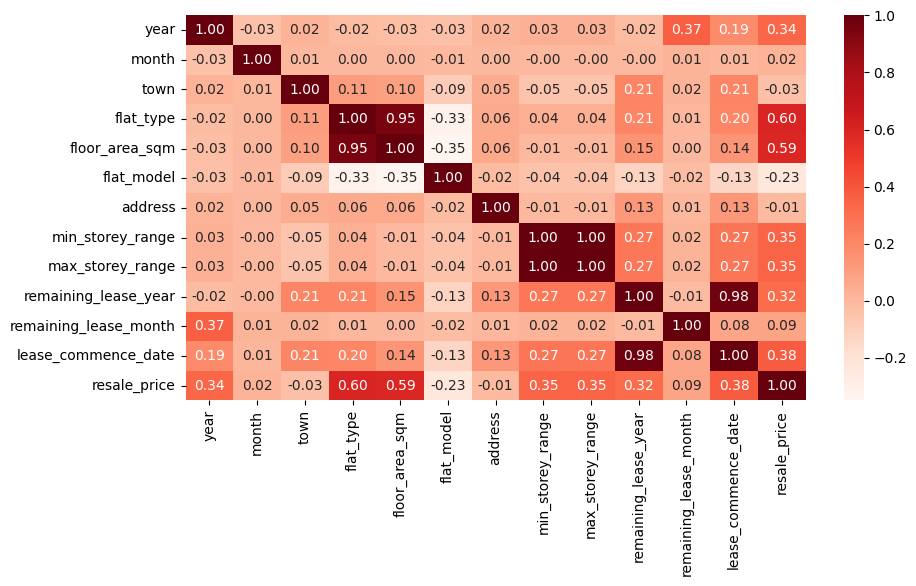

In [43]:
# Checking the Correlation using heatmap

df_data_corr= df_file_5.corr()
plt.figure(figsize=(10,5))
sns.heatmap(df_data_corr,annot= True, cmap="Reds", fmt=".2f")
plt.show()

In [44]:
df_file_6= pd.read_csv(r"C:\Users\pc\Desktop\Spore_Resale\ResaleFlatPrices.csv")
df_file_6.head(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
0,2015,1,0,2.0,60.0,5.0,1652,7,9,70,0,1986,255000.0
1,2015,1,0,2.0,68.0,12.0,6624,1,3,65,0,1981,275000.0


In [45]:
# checking the duplicate values

df_file_6.duplicated().sum()

np.int64(319)

In [46]:
# Dropping the duplicated values

df_file_7= df_file_6.drop_duplicates()
df_file_7.reset_index(drop= True, inplace= True)

In [47]:
df_file_7.tail(2)

,year,month,town,flat_type,floor_area_sqm,flat_model,address,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
233627,2024,12,25,5.0,142.0,3.0,8971,7,9,62,3,1988,950000.0
233628,2024,12,25,5.0,146.0,7.0,8931,7,9,62,3,1988,990000.0


In [48]:
# The month and address column have a very lowest correlation compared with other features
# So I'm dropping the month and address columns

df_file_8= df_file_7.drop(columns=["month","address"])

In [49]:
df_file_8.tail(2)

,year,town,flat_type,floor_area_sqm,flat_model,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
233627,2024,25,5.0,142.0,3.0,7,9,62,3,1988,950000.0
233628,2024,25,5.0,146.0,7.0,7,9,62,3,1988,990000.0


In [50]:
# detecting the skewed columns using plot
def plot(df,column):
  #distplot
  plt.figure(figsize=(15,4))
  plt.subplot(1,3,1)
  sns.distplot(df[column])
  plt.title("distplot for"+" "+column)

  #histogram plot

  plt.subplot(1,3,2)
  sns.histplot(df, x= column, kde= True, bins=30,color="salmon")
  plt.title("histogram plot for"+" "+column)

  #boxplot

  plt.subplot(1,3,3)

  sns.boxplot(df, x=column)
  plt.title("Box plot for"+" "+column)

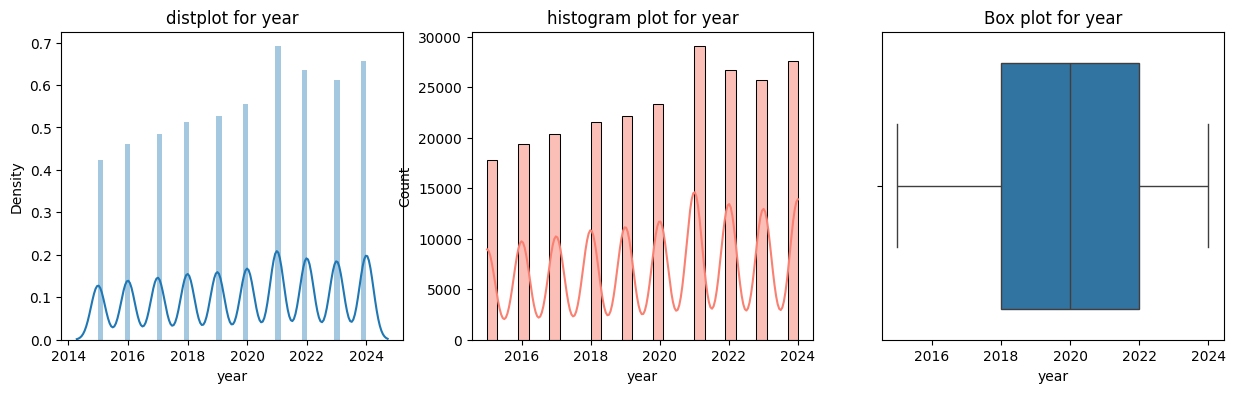

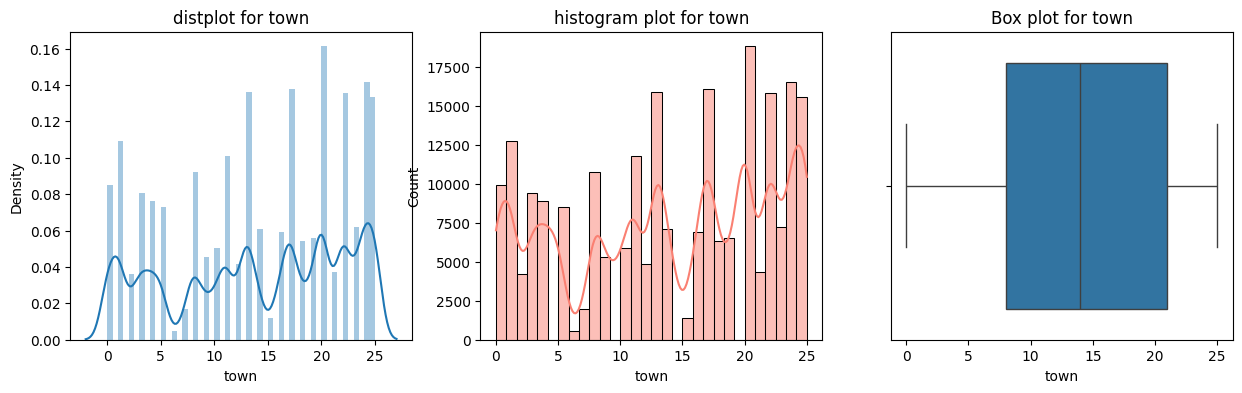

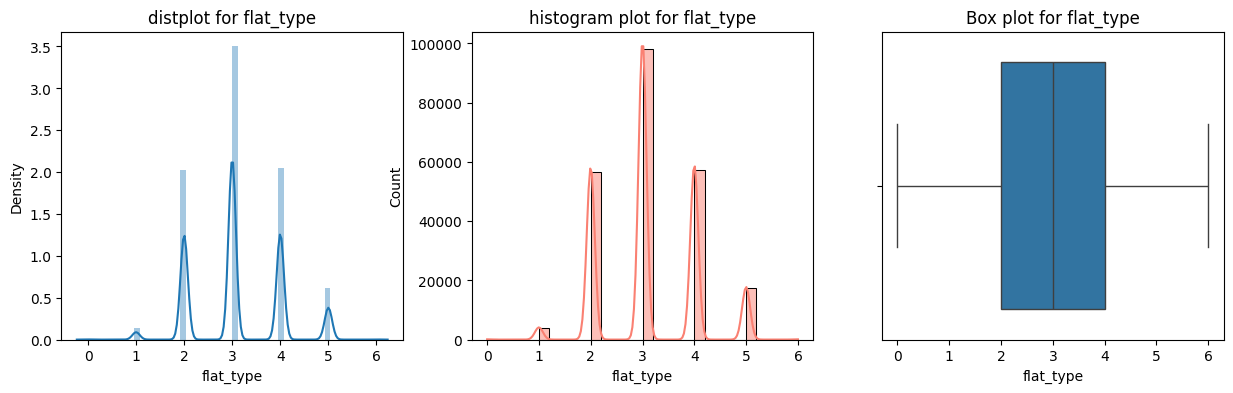

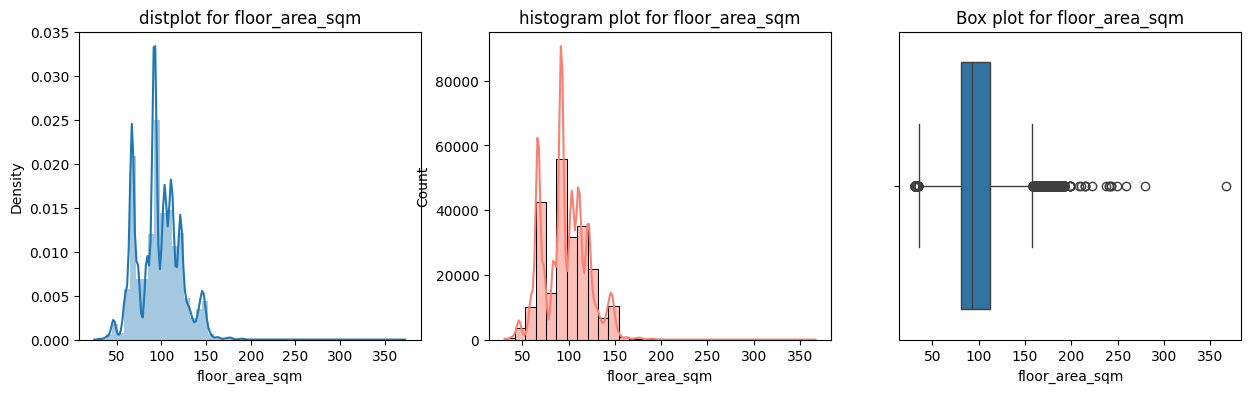

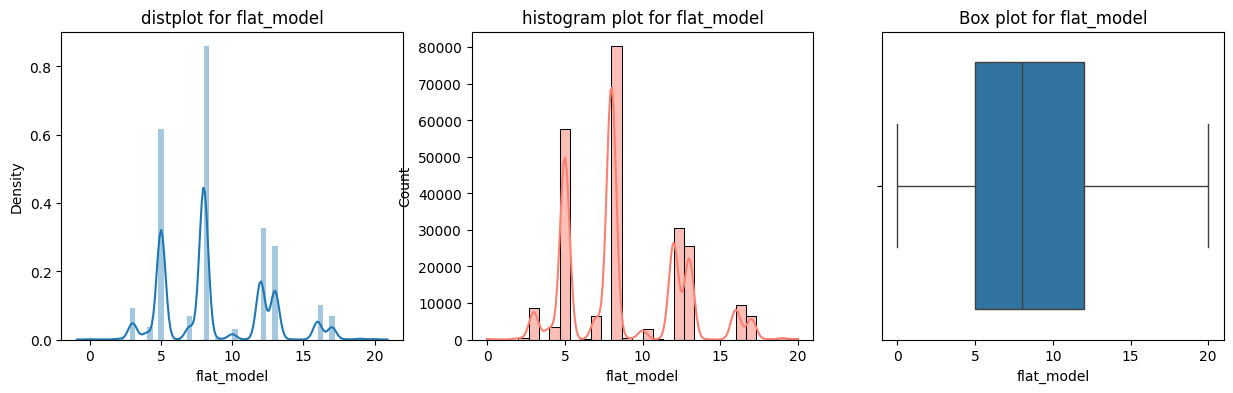

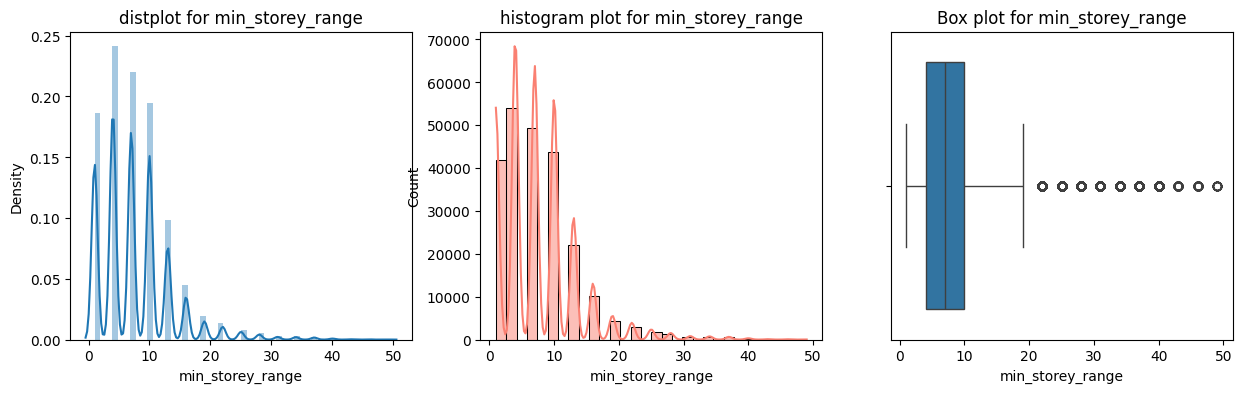

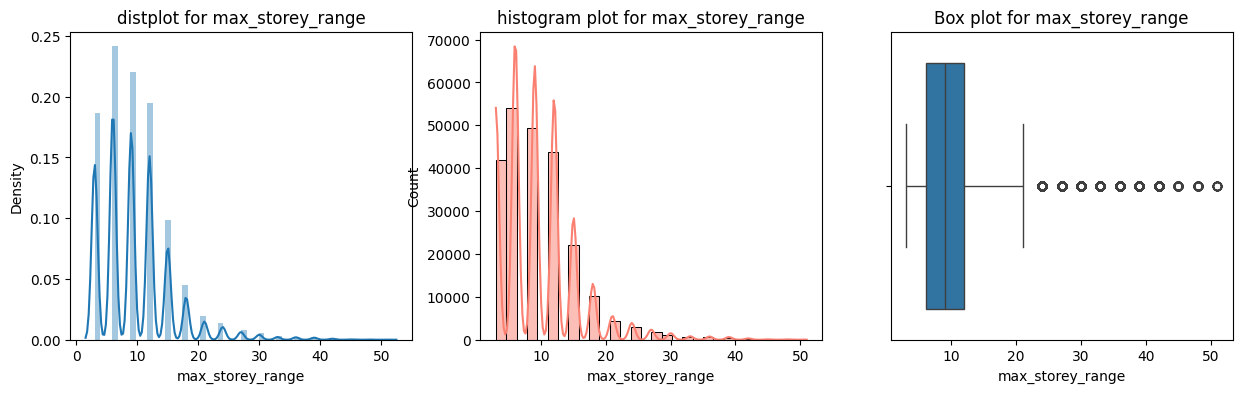

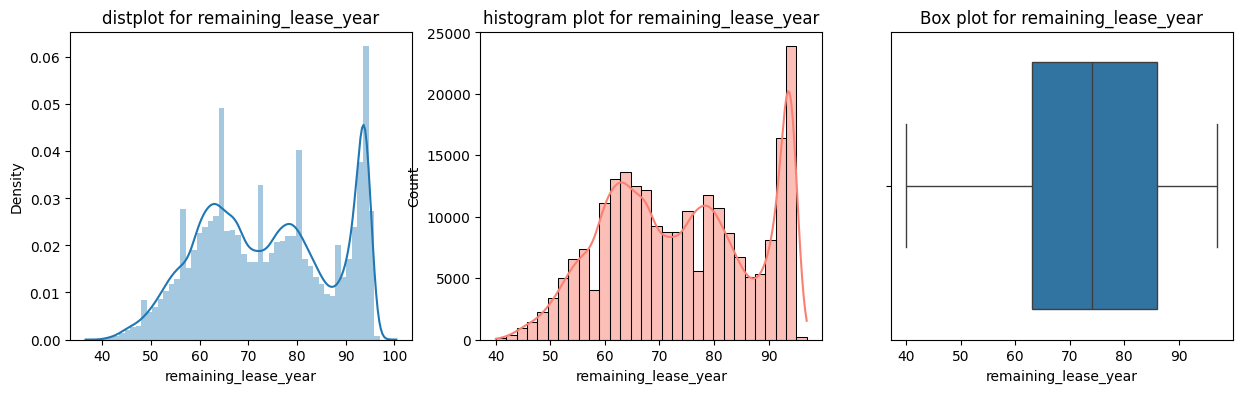

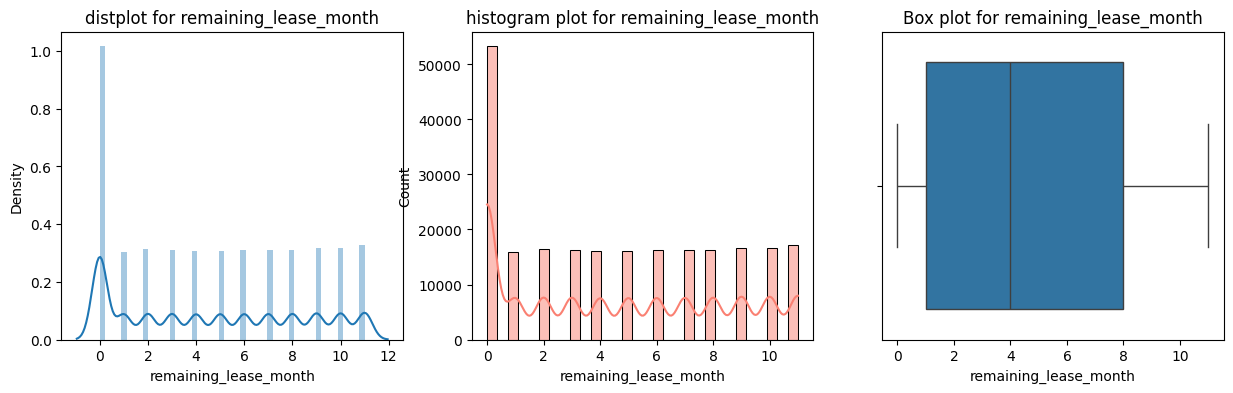

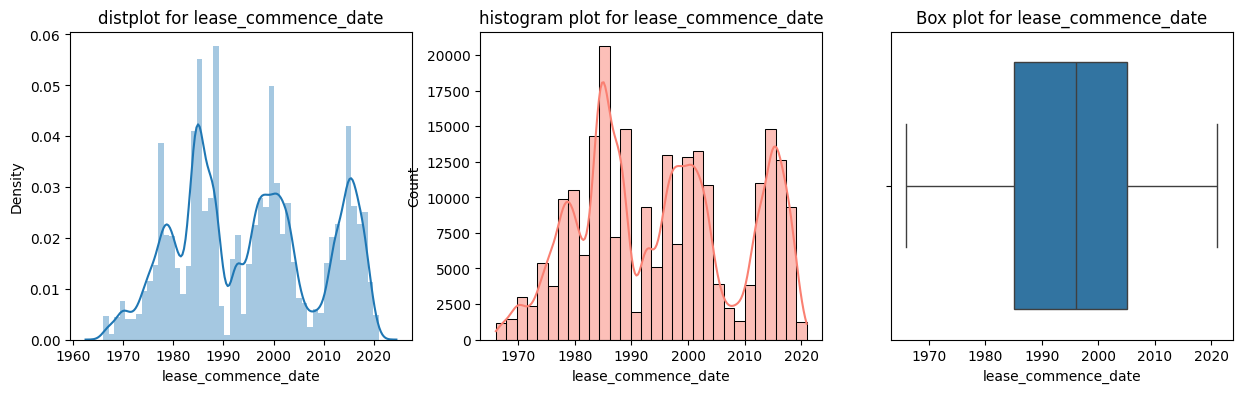

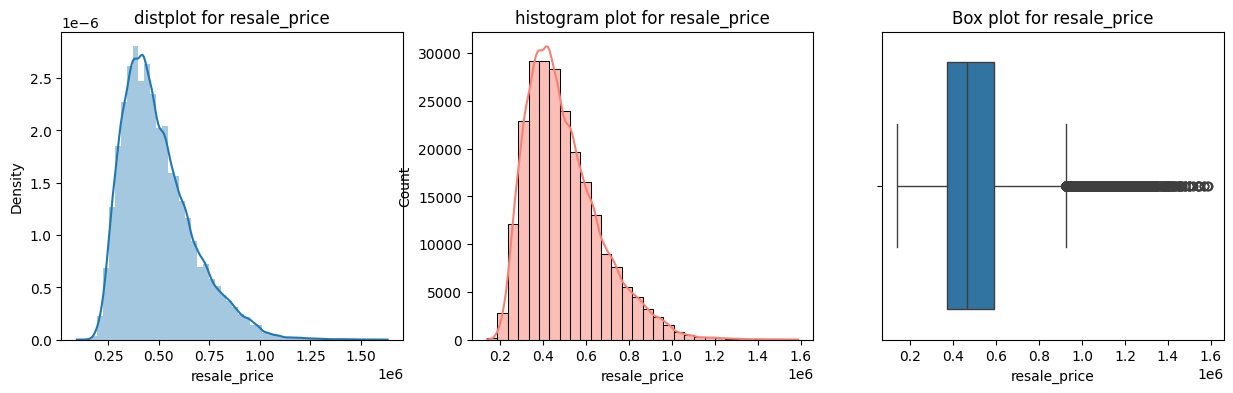

In [51]:
for i in df_file_8.columns:
    plot(df_file_8,i)

In [52]:
df_file_8.describe().T

,count,mean,std,min,25%,50%,75%,max
year,233629.0,2019.904288,2.816155,2015.0,2018.0,2020.0,2022.0,2024.0
town,233629.0,13.896712,7.953573,0.0,8.0,14.0,21.0,25.0
flat_type,233629.0,3.116595,0.919500,0.0,2.0,3.0,4.0,6.0
floor_area_sqm,233629.0,97.012178,24.062379,31.0,81.0,93.0,112.0,366.7
flat_model,233629.0,8.683567,3.638488,0.0,5.0,8.0,12.0,20.0
min_storey_range,233629.0,7.661164,5.848726,1.0,4.0,7.0,10.0,49.0
max_storey_range,233629.0,9.661164,5.848726,3.0,6.0,9.0,12.0,51.0
remaining_lease_year,233629.0,73.998365,13.606884,40.0,63.0,74.0,86.0,97.0
remaining_lease_month,233629.0,4.670469,3.771122,0.0,1.0,4.0,8.0,11.0
lease_commence_date,233629.0,1995.347363,13.810395,1966.0,1985.0,1996.0,2005.0,2021.0


### Skewness Handling

In [53]:
df_file_9= df_file_8.copy()

In [ ]:
# The Skewness Columns are

# 1. min_storey_range
# 2. max_storey_range
# 3. resale_price

In [54]:
# Applying log to make the columns symmetrical

df_file_9["min_storey_range"]= np.log(df_file_9["min_storey_range"])
df_file_9["max_storey_range"]= np.log(df_file_9["max_storey_range"])
df_file_9["resale_price"]= np.log(df_file_9["resale_price"])

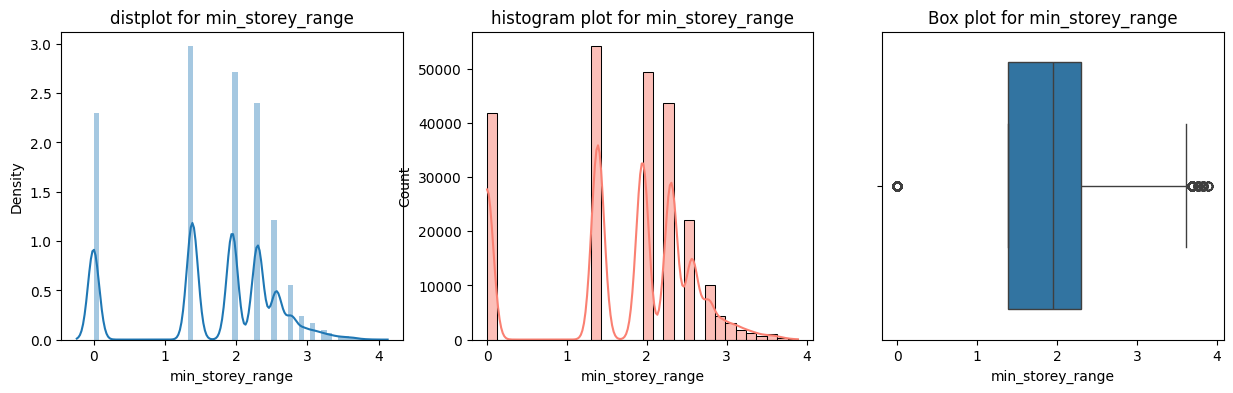

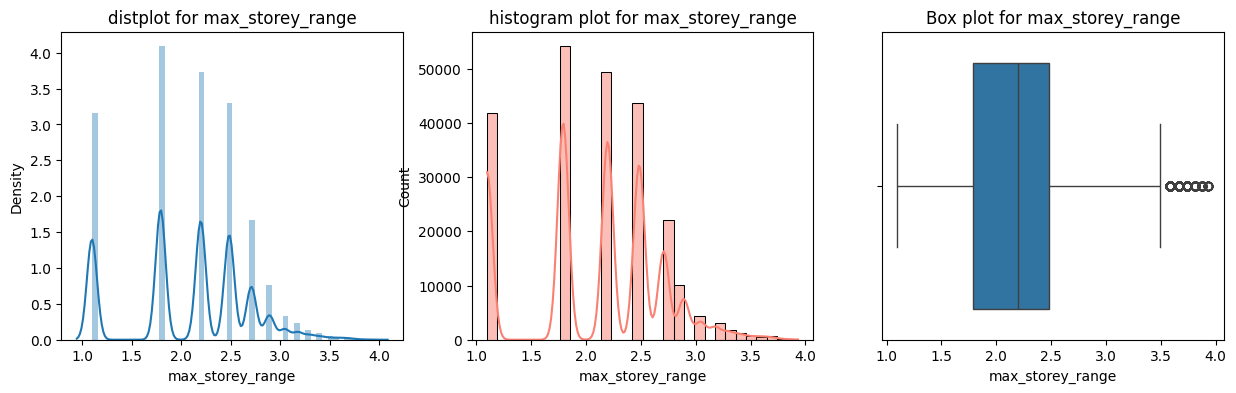

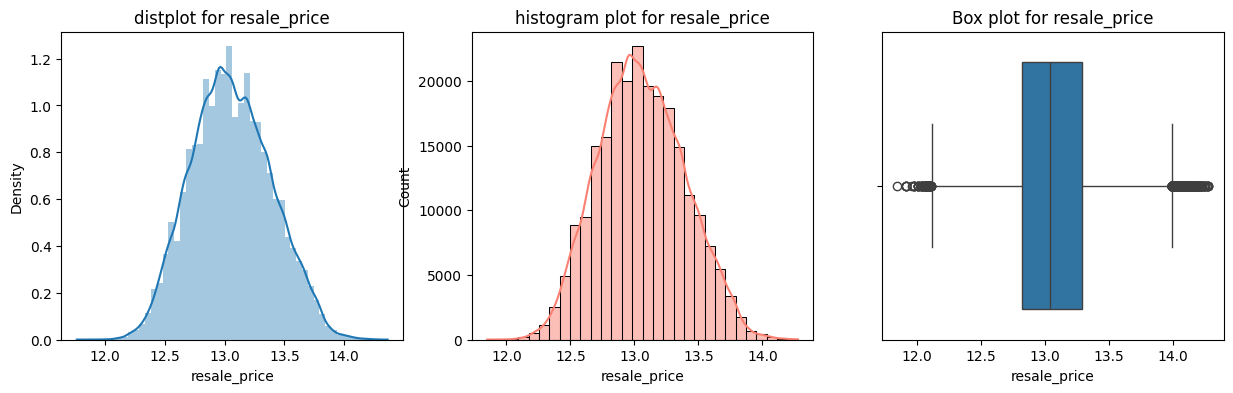

In [55]:
skewed_columns=["min_storey_range","max_storey_range","resale_price"]
for i in skewed_columns:
    plot(df_file_9,i)

### Outliers Handling - Interquartile Range(IQR) Method

In [56]:
df_file_10= df_file_9.copy()

In [ ]:
# The Outlier Columns are

# 1. floor_area_sqm
# 2. min_storey_range
# 3. max_storey_range
# 4. resale_price

# Recorrect the Outliers

In [ ]:
# (Ex: lower threshold = 5 and upper threshold = 20)
# above upper threshold values (>20) are converted to upper threshold value (20) in features
# below lower threshold values (<5)  are converted to lower threshold value (5)  in features

In [57]:
def outlier(df,column):
  q1= df[column].quantile(0.25)
  q3= df[column].quantile(0.75)

  iqr= q3-q1

  upper_threshold= q3 + (1.5*iqr)
  lower_threshold= q1 - (1.5*iqr)

  df[column]= df[column].clip(lower_threshold, upper_threshold)

In [58]:
outlier_columns=["floor_area_sqm","min_storey_range","max_storey_range","resale_price"]
for j in outlier_columns:
    outlier(df_file_10,j)

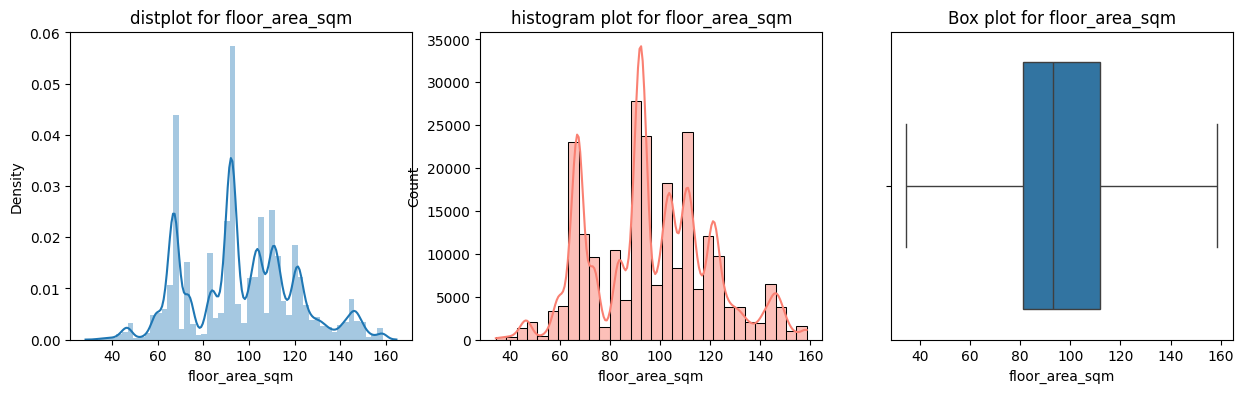

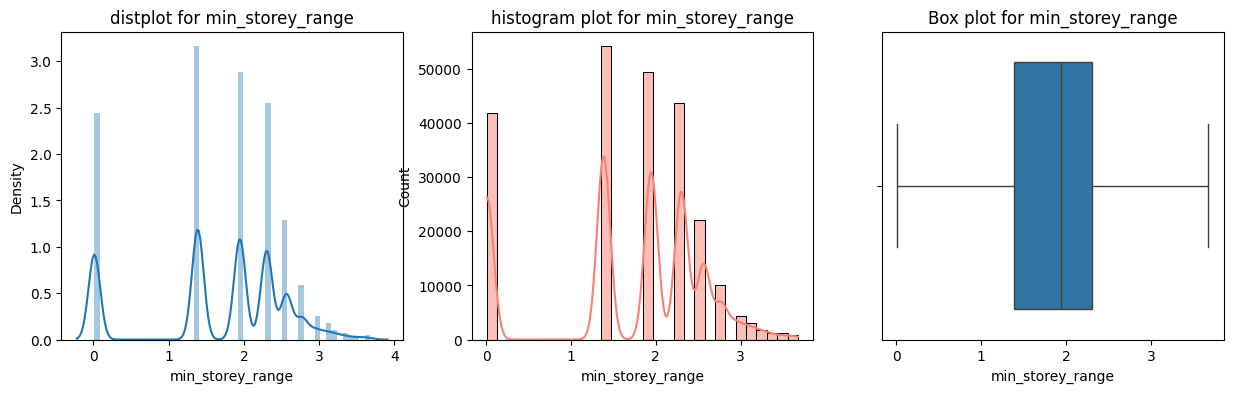

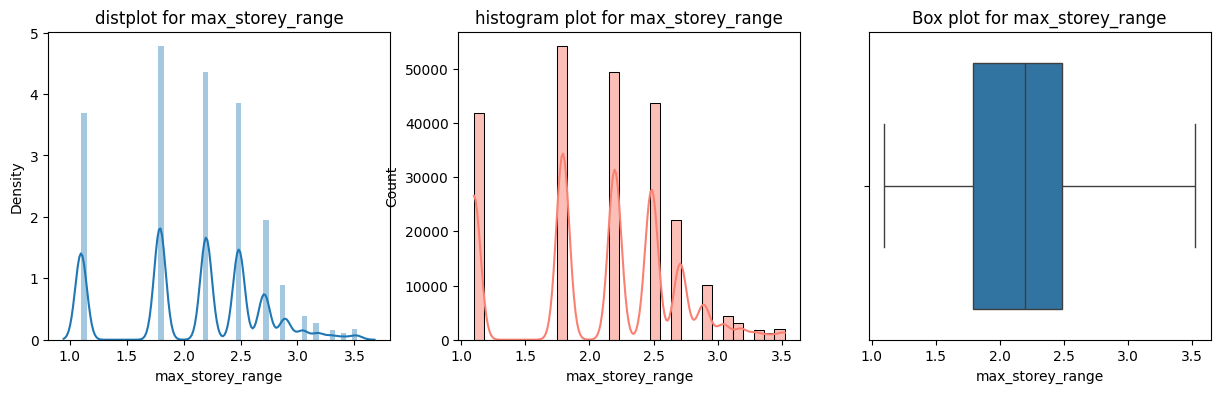

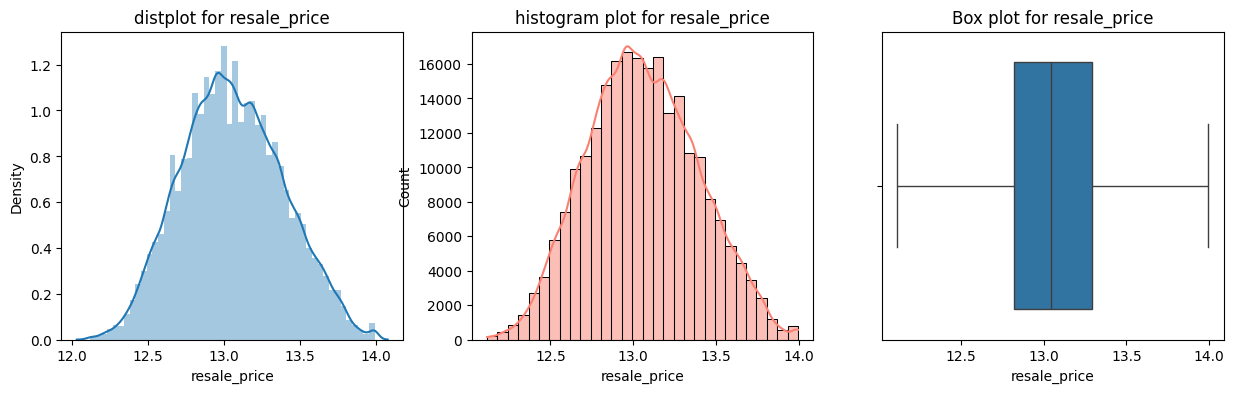

In [59]:
for k in outlier_columns:
    plot(df_file_10,k)

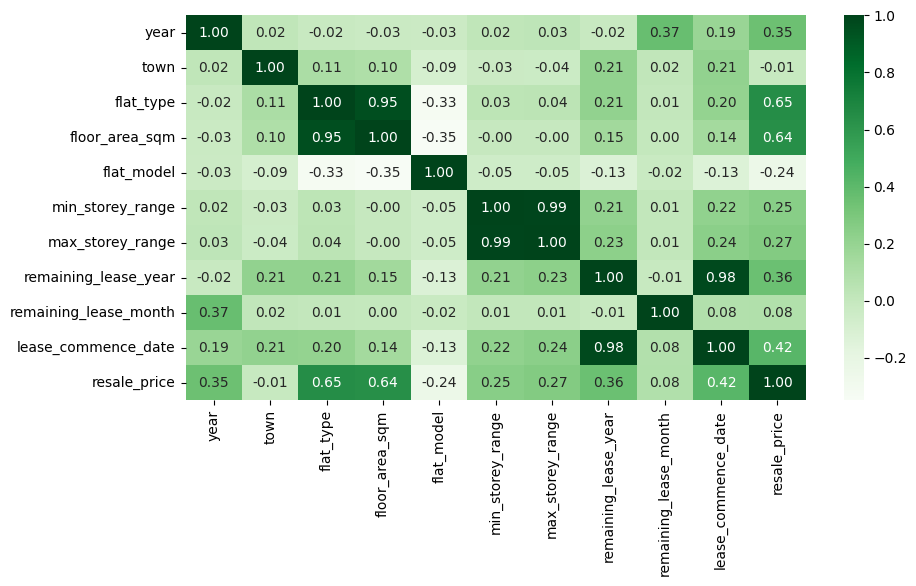

In [60]:
# Checking the correlation after the outlier recorrection

plt.figure(figsize=(10,5))
sns.heatmap(df_file_10.corr(), annot= True, cmap="Greens", fmt="0.2f")
plt.show()

### Model Selection (Regression)

In [61]:
df_file_11= df_file_10.copy()

In [62]:
df_file_11.describe().T

,count,mean,std,min,25%,50%,75%,max
year,233629.0,2019.904288,2.816155,2015.000000,2018.000000,2020.000000,2022.000000,2024.000000
town,233629.0,13.896712,7.953573,0.000000,8.000000,14.000000,21.000000,25.000000
flat_type,233629.0,3.116595,0.919500,0.000000,2.000000,3.000000,4.000000,6.000000
floor_area_sqm,233629.0,96.938516,23.823838,34.500000,81.000000,93.000000,112.000000,158.500000
flat_model,233629.0,8.683567,3.638488,0.000000,5.000000,8.000000,12.000000,20.000000
min_storey_range,233629.0,1.695479,0.921606,0.011858,1.386294,1.945910,2.302585,3.677021
max_storey_range,233629.0,2.093429,0.601780,1.098612,1.791759,2.197225,2.484907,3.524627
remaining_lease_year,233629.0,73.998365,13.606884,40.000000,63.000000,74.000000,86.000000,97.000000
remaining_lease_month,233629.0,4.670469,3.771122,0.000000,1.000000,4.000000,8.000000,11.000000
lease_commence_date,233629.0,1995.347363,13.810395,1966.000000,1985.000000,1996.000000,2005.000000,2021.000000


In [63]:
# Calculating the exponential value of the maximum value

np.exp(13.994916)

np.float64(1196505.759569341)

In [64]:
#checking how many datas are outliers based on resale_price

df_file_7[df_file_7["resale_price"] >= 1196505]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
83922,2019,4,4,4.0,112.0,5.0,9630,34,36,95,10,2016,1200000.0
90465,2019,7,14,4.0,119.0,4.0,8727,37,39,90,7,2011,1205000.0
91939,2019,8,7,4.0,106.0,20.0,1958,40,42,90,5,2011,1200000.0
105234,2020,3,7,4.0,107.0,20.0,1957,40,42,89,11,2011,1232000.0
115384,2020,9,7,4.0,106.0,20.0,1956,40,42,89,5,2011,1208000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
232186,2024,12,7,3.0,94.0,19.0,1962,28,30,85,2,2011,1340000.0
232842,2024,12,18,3.0,87.0,8.0,1864,28,30,86,11,2012,1200000.0
232852,2024,12,18,4.0,130.0,8.0,8751,13,15,67,8,1993,1220000.0
233351,2024,12,23,4.0,114.0,5.0,227,10,12,94,10,2020,1340000.0


In [65]:
# Calculating the exponential value of the minimum value

np.exp(12.117064)

np.float64(182967.53285672612)

In [66]:
#checking how many datas are outliers based on resale_price

df_file_7[df_file_7["resale_price"] <= 182967]

,year,month,town,flat_type,floor_area_sqm,flat_model,address,min_storey_range,max_storey_range,remaining_lease_year,remaining_lease_month,lease_commence_date,resale_price
47067,2017,7,4,0.0,31.0,5.0,8124,4,6,56,8,1975,175000.0
62238,2018,4,10,1.0,42.0,17.0,6232,4,6,49,9,1969,180000.0
62989,2018,4,21,2.0,64.0,5.0,3575,13,15,59,2,1978,170000.0
64274,2018,5,15,1.0,42.0,5.0,1431,1,3,55,11,1975,180000.0
64913,2018,5,23,1.0,40.0,17.0,657,4,6,49,1,1968,182000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
124864,2021,1,4,0.0,31.0,5.0,8124,4,6,53,3,1975,182000.0
126747,2021,1,24,1.0,45.0,5.0,2361,7,9,64,5,1986,180000.0
127297,2021,2,4,0.0,31.0,5.0,8124,4,6,53,1,1975,180000.0
197149,2023,8,22,2.0,67.0,8.0,6404,7,9,91,3,2015,150000.0


In [67]:
# Now I'm creating the model for "resale_price" prediction

# Importing the model

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import pickle

In [68]:
# Train Test Split for model selection
def select_model(df, algorithm):
    # x, y spliting
    x= df.drop(columns=["resale_price"])
    y= df["resale_price"]

    X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

    model= algorithm().fit(X_train,y_train)
    y_pred_train= model.predict(X_train)
    y_pred_test= model.predict(X_test)
    
    #Checking the accuracy score
    train_mse= mean_squared_error(y_train, y_pred_train)
    train_rmse= np.sqrt(train_mse)
    train_mae= mean_absolute_error(y_train, y_pred_train)
    train_r2= r2_score(y_train, y_pred_train)

    test_mse= mean_squared_error(y_test, y_pred_test)
    test_rmse= np.sqrt(test_mse)
    test_mae= mean_absolute_error(y_test, y_pred_test)
    test_r2= r2_score(y_test, y_pred_test)

    metrics_train={"Data": "Train Data",
        "Name":algorithm.__name__,
        "R2_score":train_r2,
        "Mean_squared_error":train_mse,
        "Root_mean_squared_error":train_rmse,
        "Mean_absolute_error":train_mae
        }

    metrics_test={"Data": "Test Data",
           "Name":algorithm.__name__,
           "R2_score":test_r2,
           "Mean_squared_error":test_mse,
           "Root_mean_squared_error":test_rmse,
           "Mean_absolute_error":test_mae
              }

    print(metrics_train)
    print(metrics_test)
    print("")

In [69]:
select_model(df_file_11, LinearRegression)
select_model(df_file_11, DecisionTreeRegressor)
select_model(df_file_11, RandomForestRegressor)
select_model(df_file_11, AdaBoostRegressor)
select_model(df_file_11, ExtraTreesRegressor)
select_model(df_file_11, GradientBoostingRegressor)
select_model(df_file_11, XGBRegressor)

{'Data': 'Train Data', 'Name': 'LinearRegression', 'R2_score': 0.6865474035643147, 'Mean_squared_error': 0.035363450420097226, 'Root_mean_squared_error': np.float64(0.18805172272568318), 'Mean_absolute_error': 0.14702720367185315}
{'Data': 'Test Data', 'Name': 'LinearRegression', 'R2_score': 0.6858418400843511, 'Mean_squared_error': 0.03530376251432775, 'Root_mean_squared_error': np.float64(0.18789295493532415), 'Mean_absolute_error': 0.14694171509395806}

{'Data': 'Train Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9964130160330498, 'Mean_squared_error': 0.0004046804241385671, 'Root_mean_squared_error': np.float64(0.020116670304465574), 'Mean_absolute_error': 0.007133740580174203}
{'Data': 'Test Data', 'Name': 'DecisionTreeRegressor', 'R2_score': 0.9275364057681902, 'Mean_squared_error': 0.0081431515972124, 'Root_mean_squared_error': np.float64(0.0902394126599481), 'Mean_absolute_error': 0.06438317306633874}

{'Data': 'Train Data', 'Name': 'RandomForestRegressor', 'R2_score':

In [70]:
# RandomForestClassifier is good interpretability,
# And it will detect the unseen data for this datas (without overfitting)
# So I'm selecting this algorithm  

#x,y spliting
x= df_file_11.drop(columns=["resale_price"])
y= df_file_11["resale_price"]

X_train, X_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

model_1= RandomForestRegressor().fit(X_train,y_train)
y_pred= model_1.predict(X_test)

test_mse= mean_squared_error(y_test, y_pred)
test_rmse= np.sqrt(test_mse)
test_mae= mean_absolute_error(y_test, y_pred)
test_r2= r2_score(y_test, y_pred)

metrics_test={"Data": "Test Data",
        "Name":RandomForestRegressor.__name__,
        "R2_score":test_r2,
        "Mean_squared_error":test_mse,
        "Root_mean_squared_error":test_rmse,
        "Mean_absolute_error":test_mae
            }

print(metrics_test)

{'Data': 'Test Data', 'Name': 'RandomForestRegressor', 'R2_score': 0.956513652615203, 'Mean_squared_error': 0.004886811410853169, 'Root_mean_squared_error': np.float64(0.06990573231755154), 'Mean_absolute_error': 0.05129786650431757}


In [71]:
df_file_11.iloc[10458]

year                     2015.000000
town                        4.000000
flat_type                   2.000000
floor_area_sqm             59.000000
flat_model                  5.000000
min_storey_range            1.945910
max_storey_range            2.197225
remaining_lease_year       56.000000
remaining_lease_month       0.000000
lease_commence_date      1973.000000
resale_price               12.842649
Name: 10458, dtype: float64

In [72]:
np.exp(12.842649)  

np.float64(377999.82060059055)

In [73]:
user_data = np.array([[2015,4,2,59,5,1.945910,2.197225,56,0,1973]])
y_pred_1 = model_1.predict(user_data)
y_pred_1[0]

np.float64(12.827952830857265)

In [74]:
np.exp(12.833880915898233)

np.float64(374699.9741893361)

In [75]:
import pickle
import numpy as np

In [76]:
# Saving the Model unsing pickle

with open("Resale_Flat_Prices_Model_1.pkl","wb") as f:
  pickle.dump(model_1,f)

In [77]:
with open("Resale_Flat_Prices_Model_1.pkl","rb") as f1:
    regg_model= pickle.load(f1)

In [78]:
user_data = np.array([[2015,8,5,4.955827,3,1.386294,1.791759,73,0,1990]])
y_pred_1 = regg_model.predict(user_data)
y_pred_1[0]

np.float64(12.264830449178051)

In [79]:
np.exp(12.313923357750493)

np.float64(222776.28881715712)